## Goal: Simulate, visualize and test output data 

In [83]:
import scipy
from scipy import stats
from scipy import special
from scipy.stats import beta
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
import palettable as pal
from matplotlib.colors import LogNorm

%matplotlib inline


### Definitions

def visualize_heatmap(df, axs, cmap, fig,vmin=.01, vmax=1e9, mean=True):
    df2=df.copy()
    if mean == True: 
        df2['mean']=df2.mean(axis=1)
        df2.loc['mean_ind']=df2.mean(axis=0)
    else:
        df2['mean']=df2.median(axis=1)
        df2.loc['mean_ind']=df2.median(axis=0)
    df2=df2.sort_values('mean')
    df2=df2.T.sort_values('mean_ind').T
    df2=df2.T.drop('mean').T
    df2=df2.drop('mean_ind')
    h=ax.pcolor(df2, cmap=cmap, norm=LogNorm(vmin=vmin, vmax=vmax))
    ax.margins(0,0)
    fig.colorbar(h)
        
def calc_TPM(df):
    # sum across species
    # divide each gene value by the sum
    # multiply by 1e6
    df2=df.copy()
    df2 = df2.astype('float')
    df2['sum']=df2.sum(axis=1)
    df2 = df2.T / df2['sum']
    df2 = df2.drop('sum')
    df2 = df2.T * 1e6
    return df2

## 1. Checking out the default parameters for simulate_counts.py

In [80]:
%run simulate_counts.py -o default_parameters

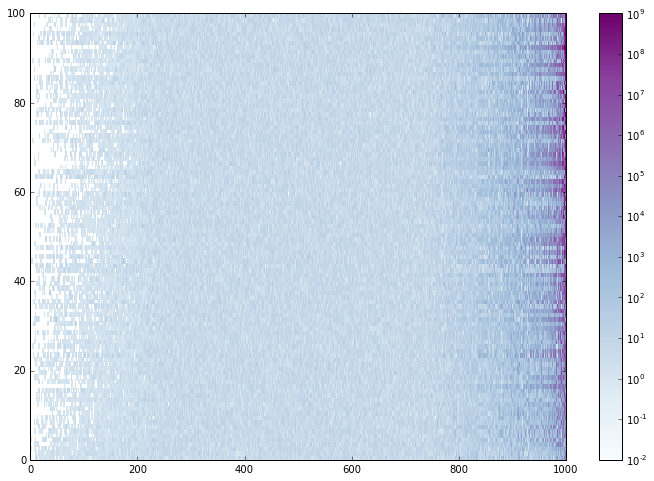

In [84]:
cmap=pal.colorbrewer.sequential.BuPu_8.get_mpl_colormap()

df=pd.read_csv('default_parameters_sim_gene_counts.csv' , index_col=0)
#df_small=df.T
df_small=df.T.head(10).T
fig, ax = plt.subplots(1)
fig.set_size_inches(12,8)
visualize_heatmap(df, ax, cmap, fig)


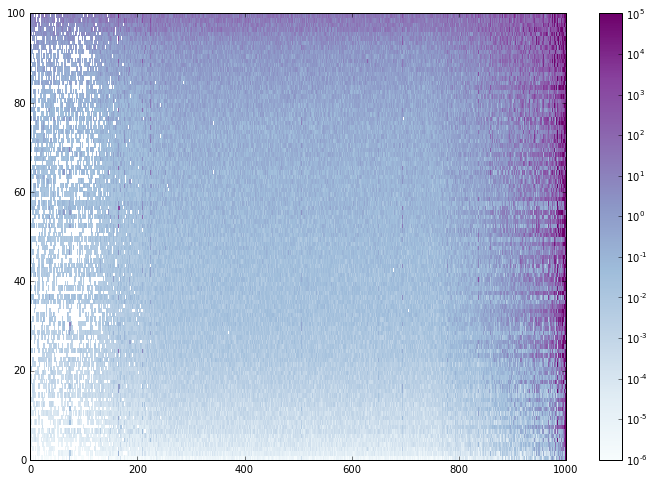

In [82]:
df_TPM = calc_TPM(df)
fig, ax = plt.subplots(1)
fig.set_size_inches(12,8)
visualize_heatmap(df_TPM, ax, cmap, fig,vmin=1e-6, vmax=1e5, mean=False)

### General observations:

- Wide variability in the total number of reads generated for each organism (this might not be perfect for our comparison as most organisms should be within 1 or 2 orders of mag. of each other)

- Want: more genes that are not common across taxa

- Want: more organisms that have constitutive expression of genes (evenness) 

## Real Data from Coscinodiscus field isoalte

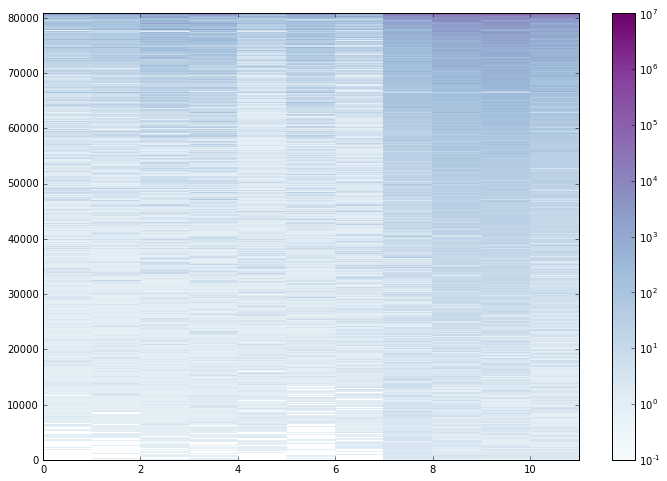

In [100]:
real=pd.read_table('../data/Cosci_Gene_ExpectedCounts.tab',index_col=0)
real=real.T.drop('Unnamed: 1').T

fig, ax = plt.subplots(1)
fig.set_size_inches(12,8)
visualize_heatmap(real, ax, cmap, fig, vmin=1e-1, vmax=1e7)

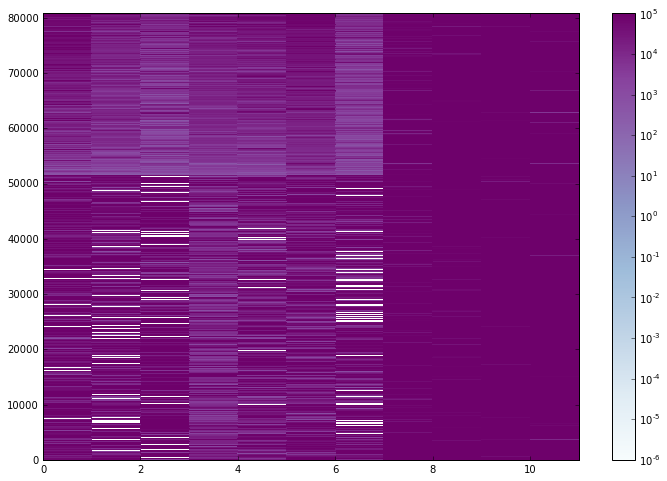

In [101]:
real_TPM = calc_TPM(real)
fig, ax = plt.subplots(1)
fig.set_size_inches(12,8)
visualize_heatmap(real_TPM, ax, cmap, fig,vmin=1e-6, vmax=1e5, mean=False)